In [77]:
# NLP Talents Team Projects Preprocessing notebook 2

import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns               
from bs4 import BeautifulSoup      

In [78]:
# data in

data = pd.read_csv('newdata.csv')
data.tail(10)

,Unnamed: 0,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
290505,868176,3/20/2021 18:45:05,@jetairways2021,Jet Airways 2021,RT @I_m_michael_asr: @STN_Airport Happy birthd...,1.373262e+18,Twitter for iPhone,2408.0,3545.0,2.0,0.0,No,11/30/2019,"Mumbai, India",India�s ???? best premium airline based at @CS...,View,"@stn_airport, @stn_airport","STN, STN","London Stansted Airpor, London Stansted Airpor"
290506,868241,3/22/2021 15:07:55,@Aviation_jamie,J,@STN_Airport Thank you very much ??????,1.373932e+18,Twitter for iPhone,260.0,171.0,0.0,1.0,No,11/4/2020,NaN,Photographer ?????? LHR Ground Handler ?? Aspi...,View,@stn_airport,STN,London Stansted Airpor
290507,868268,3/22/2021 21:54:11,@Antoine71284847,??BeeCharmer ?? Earthling ??,@STN_Airport At last ..,1.374034e+18,Twitter for iPhone,1270.0,896.0,0.0,0.0,No,11/21/2016,"Paris, London , Australasia .","??Antoinette , @VoiceoverAudio :Actor Artist &...",View,@stn_airport,STN,London Stansted Airpor
290508,868290,3/23/2021 16:05:01,@Fede282,Federico Foggia,@STN_Airport Send a DM about your opening time...,1.374309e+18,Twitter for iPhone,76.0,172.0,0.0,0.0,No,2/1/2011,A destra dalla tua sinistra,Entrepeneur Manager proudly graduated in Banki...,View,@stn_airport,STN,London Stansted Airpor
290509,868297,3/23/2021 19:11:27,@TurksonEmmanu13,WHOLE LOTTA PAIN??,@STN_Airport ????,1.374356e+18,Twitter for iPhone,577.0,1871.0,0.0,1.0,No,4/6/2020,"Accra, Ghana",God?? @manutd??@_miyaamarie??@badazzChe92????,View,@stn_airport,STN,London Stansted Airpor
290510,868309,3/23/2021 21:21:43,@AirbusRed,AirbusRed,@STN_Airport Thank you ??,1.374388e+18,Twitter for iPhone,11378.0,1057.0,0.0,0.0,No,10/3/2009,"Manchester, England",?? Airbus A320 Captain. Takes pictures of avia...,View,@stn_airport,STN,London Stansted Airpor
290511,868344,3/24/2021 13:56:49,@lou26chris,louisa hardy,@STN_Airport Good morning stansted airport ????,1.374639e+18,Twitter for iPhone,95.0,958.0,0.0,0.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
290512,868346,3/24/2021 15:03:10,@lou26chris,louisa hardy,@STN_Airport OMG ...... if only you knew how m...,1.374656e+18,Twitter for iPhone,95.0,958.0,0.0,1.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
290513,868347,3/24/2021 15:06:29,@lou26chris,louisa hardy,@STN_Airport @KevinS22551757 Spain is in my bl...,1.374656e+18,Twitter for iPhone,95.0,958.0,0.0,1.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
290514,868350,3/24/2021 15:59:14,@PeterButterfi12,Peter Butterfield,@STN_Airport Thanks @STN_Airport for your quic...,1.374670e+18,Twitter for iPhone,0.0,31.0,0.0,0.0,No,11/21/2020,NaN,NaN,View,"@stn_airport, @stn_airport","STN, STN","London Stansted Airpor, London Stansted Airpor"


In [79]:
# 290 515 rows, 19 columns)

data.shape

(290515, 19)

In [80]:
# dropping columns away

data.drop(['Screen Name', 'Full Name', 'Tweet ID', 'App', 'Verfied', 'User Since', 'Location', 'Bio', 'Profile Image'], axis = 1, inplace = True)

In [81]:
data.head()

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
0,20,11/7/2016 18:35:14,@CorkAirport @DublinAirport @BelfastAirport ht...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat..."
1,22,11/7/2016 19:12:11,@belfastairport to @Gatwick_Airport with @Ryan...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport..."
2,610,11/16/2016 23:08:02,@CorkAirport @irishexaminer great to hear more...,207.0,839.0,0.0,0.0,"@corkairport, @heathrowairport","ORK, LHR","Cork Airport, Heathrow Airport"
3,1046,11/23/2016 0:00:45,@CorkAirport @DublinAirport @TheLoopDutyFree K...,2542.0,1996.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport"
4,1308,11/27/2016 5:38:47,@CorkAirport @DublinAirport Passed over Little...,123.0,148.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport"


In [82]:
import nltk
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['Tweet Text'] = data['Tweet Text'].apply(punc_clean)
data.head(2)

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
0,20,11/7/2016 18:35:14,CorkAirport DublinAirport BelfastAirport https...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat..."
1,22,11/7/2016 19:12:11,belfastairport to GatwickAirport with Ryanair ...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport..."


In [83]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['Tweet Text'] = data['Tweet Text'].apply(remove_stopword)

In [84]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


# carry out the sentiment analysis on the  data

import nltk
nltk.downloader.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

condition = lambda title: vader.polarity_scores(title)['compound']  # Using a lambda function to treat each row of the compound function
data['compound'] = data['Tweet Text'].apply(condition)       # Applying the condition on the compound feature
data['Date'] = pd.to_datetime(data['Date']).dt.date     # Convert the data column to pandas datetime
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,compound
0,20,2016-11-07,CorkAirport DublinAirport BelfastAirport https...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat...",0.0000
1,22,2016-11-07,belfastairport GatwickAirport Ryanair ten quid...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport...",0.4767
2,610,2016-11-16,CorkAirport irishexaminer great hear routes pl...,207.0,839.0,0.0,0.0,"@corkairport, @heathrowairport","ORK, LHR","Cork Airport, Heathrow Airport",0.7783
3,1046,2016-11-23,CorkAirport DublinAirport TheLoopDutyFree Keep...,2542.0,1996.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.4404
4,1308,2016-11-27,CorkAirport DublinAirport Passed Little Island...,123.0,148.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.3612


In [85]:
period = 100

mean_df = data.groupby(['Airport_IATA_Codes','Date']).mean().unstack().xs('compound', axis='columns').transpose()
mean_df = mean_df.iloc[-period:]
mean_df.tail(50)

Airport_IATA_Codes,"ABZ, DUB","ABZ, LGW","ABZ, LHR","ABZ, LHR, LHR","ABZ, MAN","AMS, AMS, LHR","AMS, DFW, LHR, SIN, N/A","AMS, DUB","AMS, DUB, SNN","AMS, FRA, SARP, MUC, HAM, LHR",...,"YVR, TPA, YOW, LHR, DFW, DEN","YVR, YYZ, LHR, SEA, MSP, TPA","YYZ, DUB","YYZ, LAX, DUB","YYZ, LGW","YYZ, LHR","YYZ, LHR, DUB","YYZ, STN","YYZ, YVR, MIA, LHR, SFO, FRA","YYZ, YYZ, LGW"
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


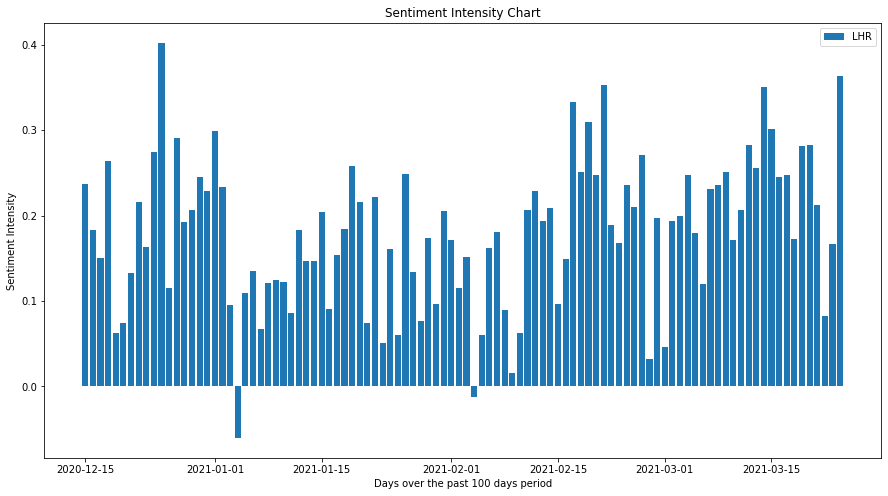

In [86]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.LHR , label='LHR') 

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

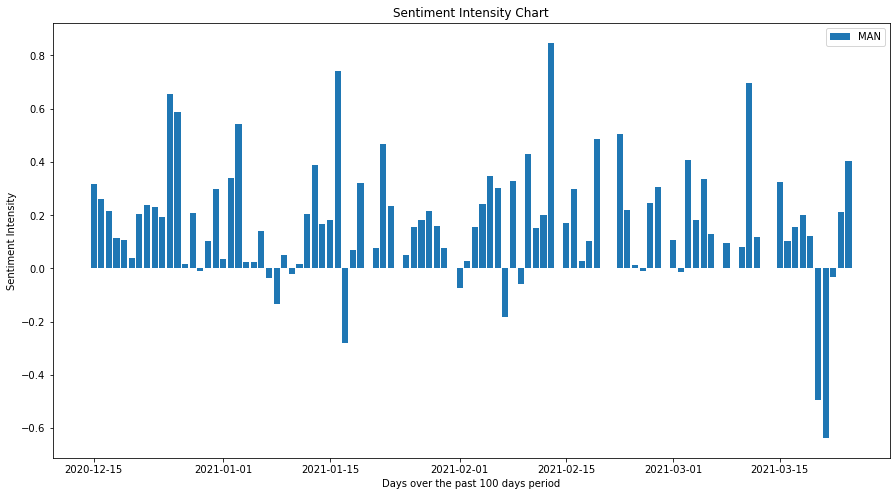

In [87]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.MAN, label='MAN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

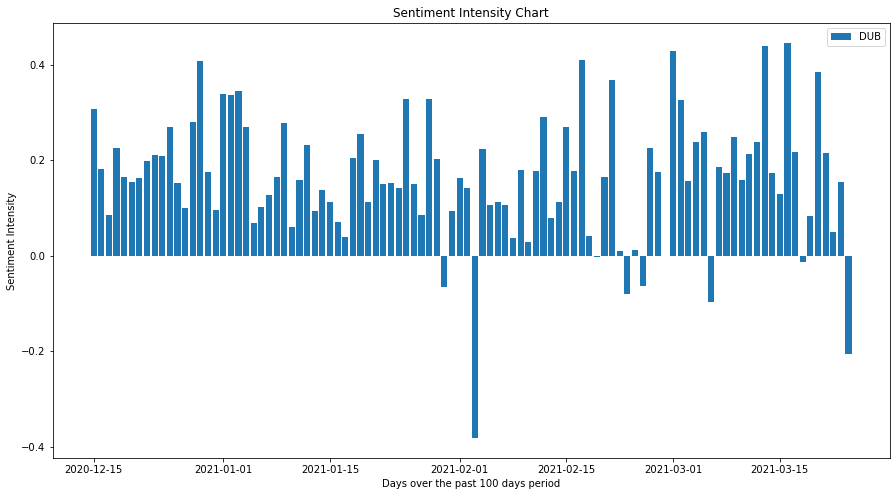

In [88]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.DUB, label='DUB')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

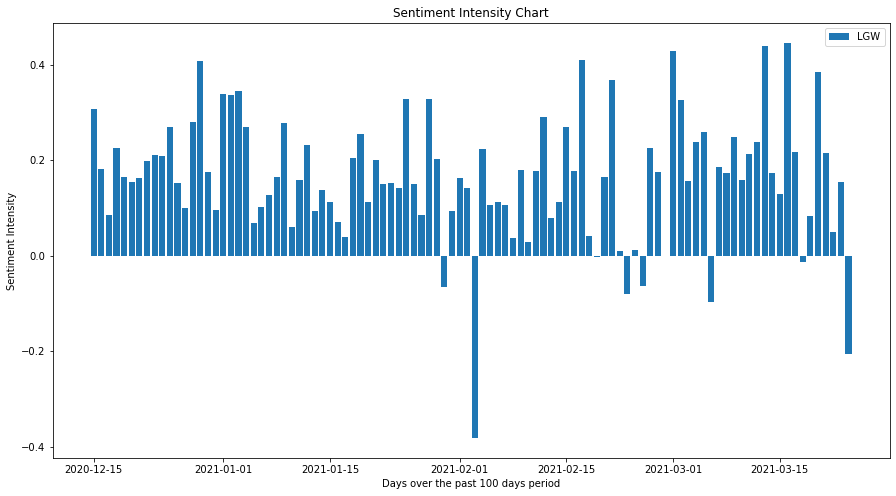

In [89]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.DUB, label='LGW')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

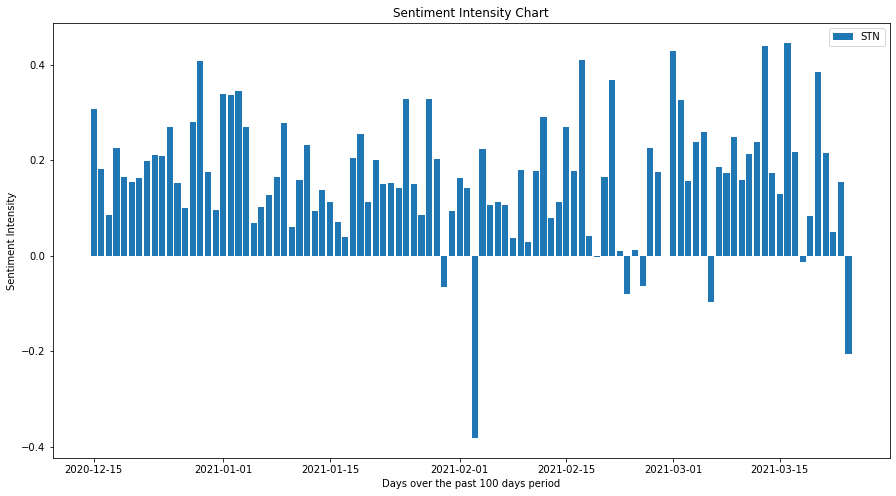

In [90]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.DUB, label='STN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

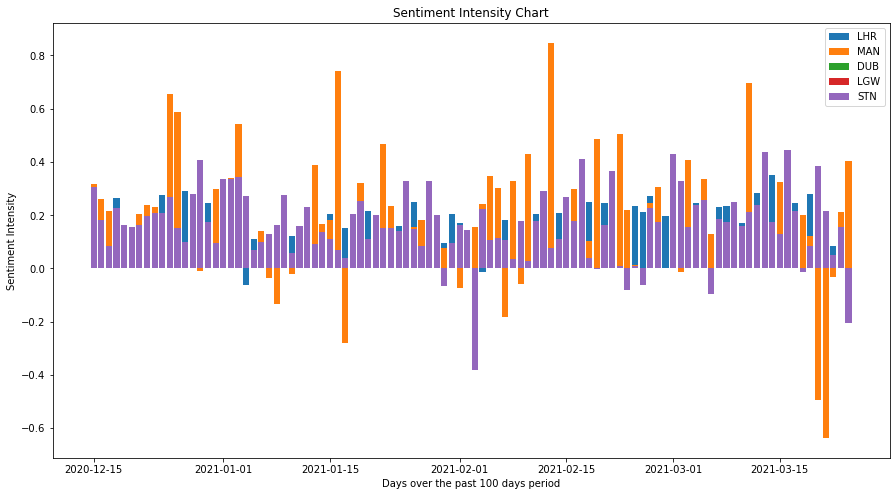

In [91]:
# Plot a bar chart to visualize our sentiments.
# LHR    0.102629
# MAN    0.083148
# DUB    0.064212
# LGW    0.053382
# STN    0.045671

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.LHR , label='LHR') 
plt.bar(mean_df.index,mean_df.MAN, label='MAN')
plt.bar(mean_df.index,mean_df.DUB, label='DUB')
plt.bar(mean_df.index,mean_df.DUB, label='LGW')
plt.bar(mean_df.index,mean_df.DUB, label='STN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

In [92]:
df_new = data[data['Tweet Text'].notnull()]

In [93]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290515 entries, 0 to 290514
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           290515 non-null  int64  
 1   Date                 290515 non-null  object 
 2   Tweet Text           290515 non-null  object 
 3   Followers            290515 non-null  float64
 4   Follows              290515 non-null  float64
 5   Retweets             290515 non-null  float64
 6   Favorites            290515 non-null  float64
 7   Airport_Twitter_Tag  290515 non-null  object 
 8   Airport_IATA_Codes   290515 non-null  object 
 9   Airport_Names        290515 non-null  object 
 10  compound             290515 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 26.6+ MB


<ipython-input-93-75795557cc2b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_new.info(null_counts=True)


In [94]:
df_new.isnull().any().any()

False

In [95]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


df_new['clean_tweet'] = df_new['Tweet Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df_new = df2[df2['Tweet Text'].notnull()]

In [73]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290515 entries, 0 to 290514
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           290515 non-null  int64  
 1   Date                 290515 non-null  object 
 2   Screen Name          290515 non-null  object 
 3   Full Name            290510 non-null  object 
 4   Tweet Text           290515 non-null  object 
 5   Tweet ID             290515 non-null  float64
 6   App                  290499 non-null  object 
 7   Followers            290515 non-null  float64
 8   Follows              290515 non-null  float64
 9   Retweets             290515 non-null  float64
 10  Favorites            290515 non-null  float64
 11  Verfied              290515 non-null  object 
 12  User Since           290515 non-null  object 
 13  Location             206034 non-null  object 
 14  Bio                  211940 non-null  object 
 15  Profile Image    

<ipython-input-73-75795557cc2b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_new.info(null_counts=True)


In [96]:
df_new.isnull().any().any()

False

In [97]:
df_new['clean_tweet'] = df_new['Tweet Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [98]:
df_new.head()

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,compound,clean_tweet
0,20,2016-11-07,CorkAirport DublinAirport BelfastAirport https...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat...",0.0000,CorkAirport DublinAirport BelfastAirport https...
1,22,2016-11-07,belfastairport GatwickAirport Ryanair ten quid...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport...",0.4767,belfastairport GatwickAirport Ryanair ten quid...
2,610,2016-11-16,CorkAirport irishexaminer great hear routes pl...,207.0,839.0,0.0,0.0,"@corkairport, @heathrowairport","ORK, LHR","Cork Airport, Heathrow Airport",0.7783,CorkAirport irishexaminer great hear routes pl...
3,1046,2016-11-23,CorkAirport DublinAirport TheLoopDutyFree Keep...,2542.0,1996.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.4404,CorkAirport DublinAirport TheLoopDutyFree Keep...
4,1308,2016-11-27,CorkAirport DublinAirport Passed Little Island...,123.0,148.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.3612,CorkAirport DublinAirport Passed Little Island...


In [99]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [100]:
df_new.head()

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,compound,clean_tweet,vader_score
0,20,2016-11-07,CorkAirport DublinAirport BelfastAirport https...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat...",0.0000,CorkAirport DublinAirport BelfastAirport https...,0.0000
1,22,2016-11-07,belfastairport GatwickAirport Ryanair ten quid...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport...",0.4767,belfastairport GatwickAirport Ryanair ten quid...,0.4767
2,610,2016-11-16,CorkAirport irishexaminer great hear routes pl...,207.0,839.0,0.0,0.0,"@corkairport, @heathrowairport","ORK, LHR","Cork Airport, Heathrow Airport",0.7783,CorkAirport irishexaminer great hear routes pl...,0.7783
3,1046,2016-11-23,CorkAirport DublinAirport TheLoopDutyFree Keep...,2542.0,1996.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.4404,CorkAirport DublinAirport TheLoopDutyFree Keep...,0.4404
4,1308,2016-11-27,CorkAirport DublinAirport Passed Little Island...,123.0,148.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.3612,CorkAirport DublinAirport Passed Little Island...,0.3612


In [101]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [102]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(117359, 173156)

In [103]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

In [104]:
df_new.head(5)

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,compound,clean_tweet,vader_score,vader_sentiment_label
0,20,2016-11-07,CorkAirport DublinAirport BelfastAirport https...,156.0,590.0,0.0,0.0,"@corkairport, @dublinairport, @belfastairport","ORK, DUB, BFS","Cork Airport, Dublin Airport, Belfast Internat...",0.0000,CorkAirport DublinAirport BelfastAirport https...,0.0000,0
1,22,2016-11-07,belfastairport GatwickAirport Ryanair ten quid...,754.0,701.0,0.0,0.0,"@belfastairport, @gatwick_airport","BFS, LGW","Belfast International Airport, Gatwick Airport...",0.4767,belfastairport GatwickAirport Ryanair ten quid...,0.4767,1
2,610,2016-11-16,CorkAirport irishexaminer great hear routes pl...,207.0,839.0,0.0,0.0,"@corkairport, @heathrowairport","ORK, LHR","Cork Airport, Heathrow Airport",0.7783,CorkAirport irishexaminer great hear routes pl...,0.7783,1
3,1046,2016-11-23,CorkAirport DublinAirport TheLoopDutyFree Keep...,2542.0,1996.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.4404,CorkAirport DublinAirport TheLoopDutyFree Keep...,0.4404,1
4,1308,2016-11-27,CorkAirport DublinAirport Passed Little Island...,123.0,148.0,0.0,0.0,"@corkairport, @dublinairport","ORK, DUB","Cork Airport, Dublin Airport",0.3612,CorkAirport DublinAirport Passed Little Island...,0.3612,1


In [105]:
df_new = df_new[['Unnamed: 0', 'Date', 'vader_sentiment_label', 'vader_score', 'clean_tweet', 'Airport_IATA_Codes']]

In [106]:
df_new.head()

,Unnamed: 0,Date,vader_sentiment_label,vader_score,clean_tweet,Airport_IATA_Codes
0,20,2016-11-07,0,0.0000,CorkAirport DublinAirport BelfastAirport https...,"ORK, DUB, BFS"
1,22,2016-11-07,1,0.4767,belfastairport GatwickAirport Ryanair ten quid...,"BFS, LGW"
2,610,2016-11-16,1,0.7783,CorkAirport irishexaminer great hear routes pl...,"ORK, LHR"
3,1046,2016-11-23,1,0.4404,CorkAirport DublinAirport TheLoopDutyFree Keep...,"ORK, DUB"
4,1308,2016-11-27,1,0.3612,CorkAirport DublinAirport Passed Little Island...,"ORK, DUB"


In [107]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [108]:
positive_num,neutral_num, negative_num

(117359, 129469, 43687)

In [109]:
# A new column for positive and negative sentiment 'vader_sentiment_label_string'
df_new['vader_sentiment_label_string'] = df_new['vader_sentiment_label'].replace({1 : 'Positive', 0 : 'Negative'})
df_new

,Unnamed: 0,Date,vader_sentiment_label,vader_score,clean_tweet,Airport_IATA_Codes,vader_sentiment_label_string
0,20,2016-11-07,0,0.0000,CorkAirport DublinAirport BelfastAirport https...,"ORK, DUB, BFS",Negative
1,22,2016-11-07,1,0.4767,belfastairport GatwickAirport Ryanair ten quid...,"BFS, LGW",Positive
2,610,2016-11-16,1,0.7783,CorkAirport irishexaminer great hear routes pl...,"ORK, LHR",Positive
3,1046,2016-11-23,1,0.4404,CorkAirport DublinAirport TheLoopDutyFree Keep...,"ORK, DUB",Positive
4,1308,2016-11-27,1,0.3612,CorkAirport DublinAirport Passed Little Island...,"ORK, DUB",Positive
...,...,...,...,...,...,...,...
290510,868309,2021-03-23,1,0.3612,STNAirport Thank,STN,Positive
290511,868344,2021-03-24,1,0.4404,STNAirport Good morning stansted airport,STN,Positive
290512,868346,2021-03-24,1,0.1045,STNAirport OMG knew much I missed I little hop...,STN,Positive
290513,868347,2021-03-24,0,0.0000,STNAirport KevinS22551757 Spain blood literall...,STN,Negative


In [110]:
# data

print("Shape of the dataframe is",df_new.shape)
print("The number of nulls in each column are \n", df_new.isna().sum())

Shape of the dataframe is (290515, 7)
The number of nulls in each column are 
 Unnamed: 0                      0
Date                            0
vader_sentiment_label           0
vader_score                     0
clean_tweet                     0
Airport_IATA_Codes              0
vader_sentiment_label_string    0
dtype: int64


In [111]:
df_new.to_csv('vadersentimentdata.csv')